## Introduction

We have a data which classified if Bank customer leave the bank or not according to features in it. We will try to use this data to create a model which tries predict if a customer will leave or not. In the beginning we will use logistic regression (classification) algorithm. Then we will look other algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Read Data
$ $

In [2]:
df=pd.read_csv("/Users/taronzakaryan/ml/datasets/Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



$ $

Data contains; 


- RowNumber
- CustomerId
- Surname
- Creditscore 
- Geography - (France, Spain, Germany)
- Gender - (Famale; Male)
- age - age in years 
- Tenure - (from 1 to 10 years)
- Balance
- NumberOfProducts
- HasCrCard - (1=yes, 0=no)
- IsActiveMember - (1=yes, 0=no)
- EstimatedSalary
- Exited - Did they leave the bank (1=yes, 0=no)

$ $ 

### Data Exploration
$ $

We notice that features RowNumber, CustomerId and Surname are useless for our peorpuse. So we can drop them from the data.

In [3]:
df=df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

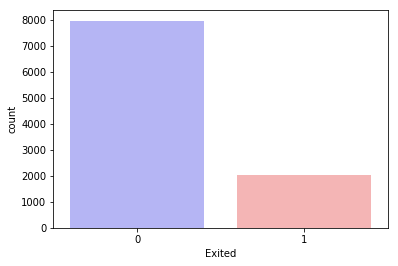

In [6]:
sns.countplot(x="Exited", data=df, palette="bwr")
plt.show()

In [7]:
countnotleave = len(df[df.Exited == 0])
countleave = len(df[df.Exited == 1])
print("Percentage of Costumers who didn't leave: {:.2f}%".format((countnotleave / (len(df.Exited))*100)))
print("Percentage of Costumers who did leave: {:.2f}%".format((countleave / (len(df.Exited))*100)))

Percentage of Costumers who didn't leave: 79.63%
Percentage of Costumers who did leave: 20.37%


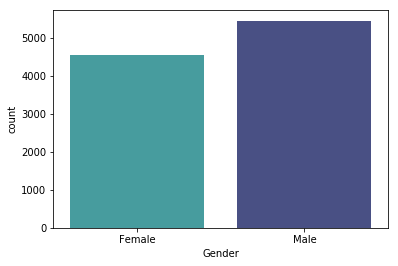

In [8]:
sns.countplot(x='Gender', data=df, palette="mako_r")
plt.xlabel("Gender")
plt.show()

In [9]:
countFemale = len(df[df.Gender == 'Female'])
countMale = len(df[df.Gender == 'Male'])
print("Percentage of Female Customers: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Percentage of Male Customers: {:.2f}%".format((countMale / (len(df.Gender))*100)))

Percentage of Female Customers: 45.43%
Percentage of Male Customers: 54.57%


In [10]:
df.groupby('Exited').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


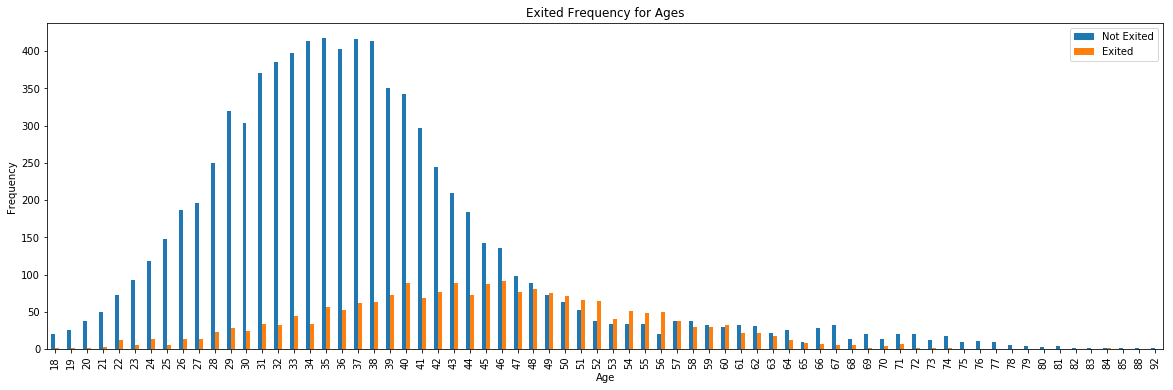

In [11]:
pd.crosstab(df.Age,df.Exited).plot(kind="bar",figsize=(20,6))
#sns.countplot(x='Age', hue='Exited', data=df)
plt.title('Exited Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Not Exited", "Exited"])
#plt.savefig('LeavethebankAndAges.png')
plt.show()

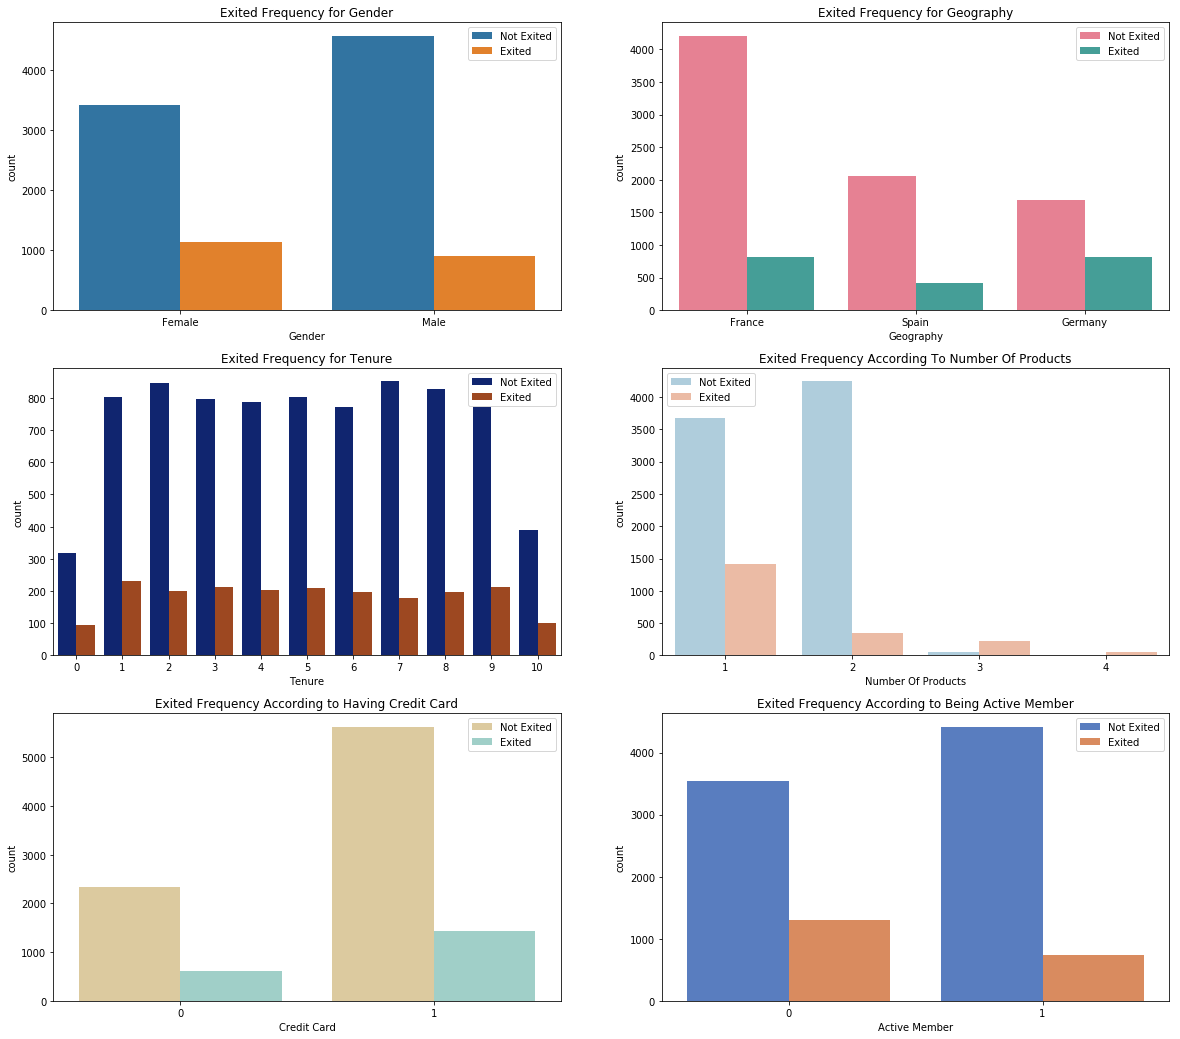

In [12]:
plt.figure(figsize=(20,18))

plt.subplot(3,2,1)
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Exited Frequency for Gender')
#plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(["Not Exited", "Exited"])
#plt.ylabel('Frequency')
#plt.show()

plt.subplot(3,2,2)
sns.countplot(x='Geography', hue='Exited', data=df, palette="husl")
plt.title('Exited Frequency for Geography')
#plt.xlabel('Geography')
plt.xticks(rotation=0)
plt.legend(["Not Exited", "Exited"])
#plt.ylabel('Frequency')
#plt.show()

plt.subplot(3,2,3)
sns.countplot(x='Tenure', hue='Exited', data=df, palette="dark")
plt.title('Exited Frequency for Tenure')
plt.xlabel('Tenure')
plt.xticks(rotation=0)
plt.legend(["Not Exited", "Exited"])
#plt.ylabel('Frequency')
#plt.show()

plt.subplot(3,2,4)
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette="RdBu_r")
plt.title('Exited Frequency According To Number Of Products')
plt.xlabel('Number Of Products')
plt.xticks(rotation = 0)
plt.legend(["Not Exited", "Exited"])
#plt.ylabel('Frequency of leave or not')


plt.subplot(3,2,5)
sns.countplot(x='HasCrCard', hue='Exited', data=df, palette="BrBG")
plt.title('Exited Frequency According to Having Credit Card')
plt.xlabel('Credit Card')
plt.xticks(rotation=0)
plt.legend(["Not Exited", "Exited"])
#plt.ylabel('Frequency')


plt.subplot(3,2,6)
sns.countplot(x="IsActiveMember", hue="Exited", data=df, palette="muted")
plt.title('Exited Frequency According to Being Active Member')
plt.xlabel('Active Member')
plt.legend(["Not Exited", "Exited"])

plt.show()

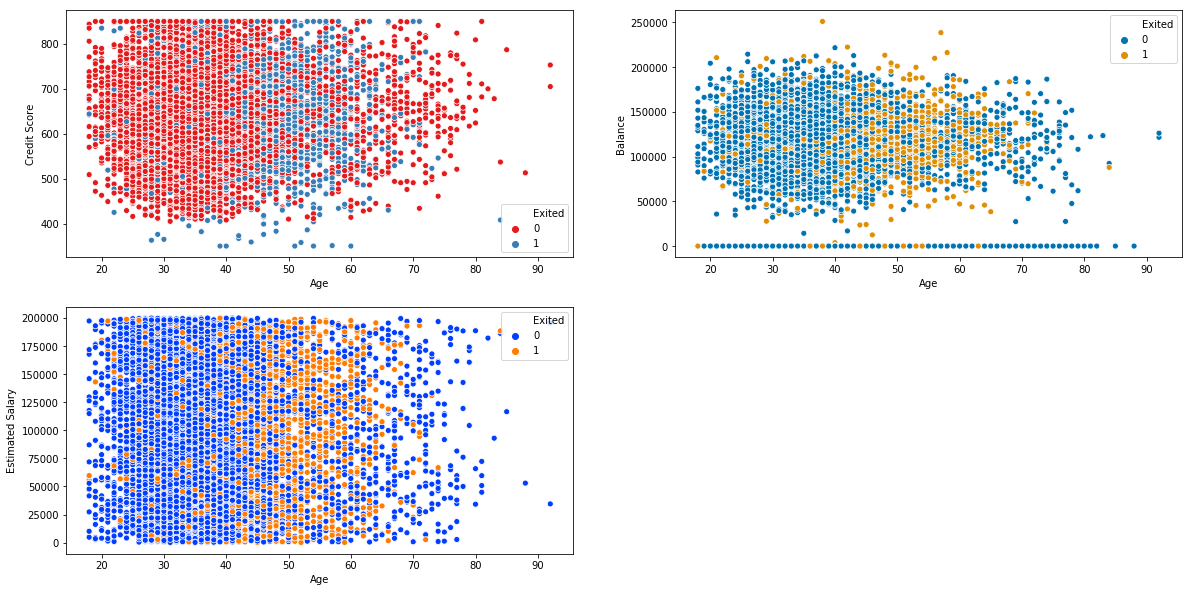

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.scatterplot(x="Age", y="CreditScore", hue="Exited", data=df, palette="Set1")
plt.ylabel("Credit Score")
#plt.legend(["not Exited", "Exited"])

plt.subplot(2,2,2)
sns.scatterplot(x="Age", y="Balance", hue='Exited', data=df, palette="colorblind")
#plt.legend(["not Exited", "Exited"])
#plt.ylabel('Balance')
#plt.show()

plt.subplot(2,2,3)
sns.scatterplot(x="Age", y="EstimatedSalary", hue='Exited', data=df, palette="bright")
#plt.legend(["Not Exited", "Exited"])
plt.ylabel('Estimated Salary')

plt.show()

$ $

We can as well transform these continous variables to categorical variables.

$ $

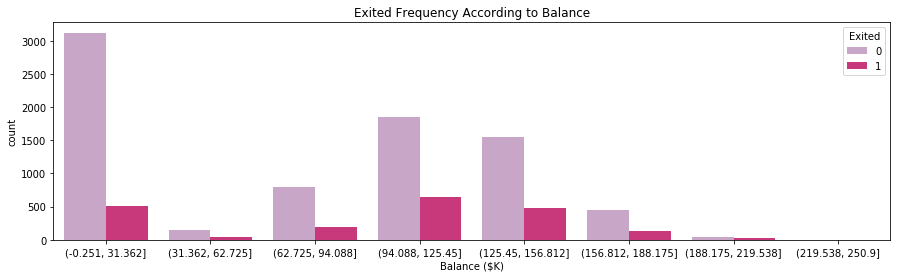

In [14]:
plt.figure(figsize=(15,4))
new_Balance=pd.cut(round(df.Balance/1000,1),8)
sns.countplot(new_Balance, hue=df.Exited, palette='PuRd')
plt.xlabel('Balance ($K)')
plt.title('Exited Frequency According to Balance')
dfb=pd.get_dummies(new_Balance)

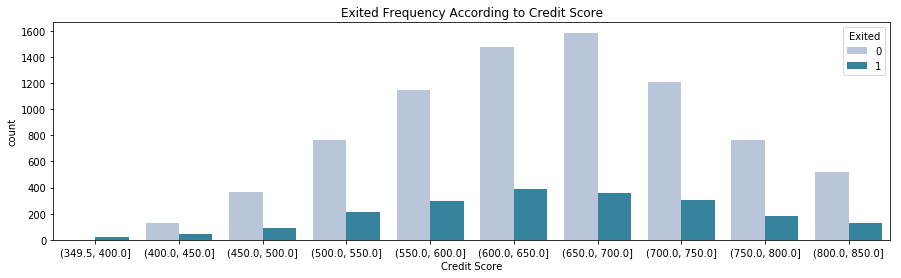

In [15]:
plt.figure(figsize=(15,4))
new_CS=pd.cut(df.CreditScore,10)
sns.countplot(new_CS, hue=df.Exited, palette='PuBuGn')
plt.xlabel('Credit Score')
plt.title('Exited Frequency According to Credit Score')
dfcs=pd.get_dummies(new_CS)

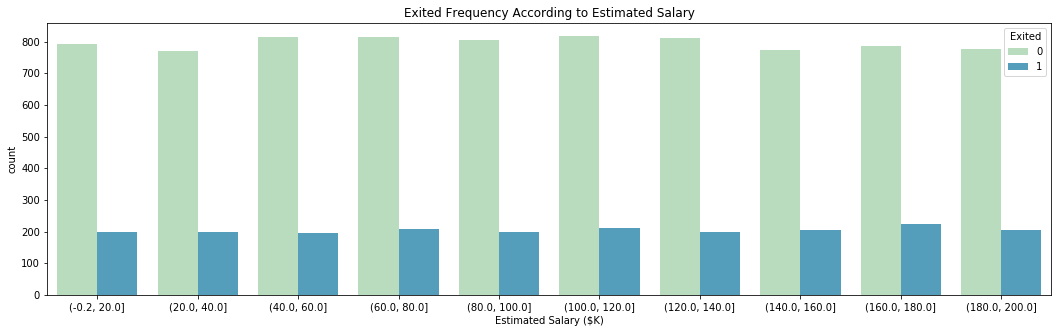

In [16]:
plt.figure(figsize=(18,5))
new_sal=pd.cut(round(df.EstimatedSalary/1000,1),bins=10)
sns.countplot(new_sal, hue=df.Exited, palette='GnBu')
plt.xlabel('Estimated Salary ($K)')
plt.title('Exited Frequency According to Estimated Salary')
dfsalary=pd.get_dummies(new_sal)
#dfsalary.head()

In [17]:
#plt.figure(figsize=(14,10))
#sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
#plt.show()

$ $

### Creating Dummy Variables

$   $

Since 'Gender' and 'Geography' are categorical variables we'll turn them into dummy variables.

In [18]:
sex=pd.get_dummies(df['Gender'])
country=pd.get_dummies(df['Geography'])

In [19]:
df=pd.concat([df,sex,country],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [20]:
df = df.drop(columns = ['Gender', 'Geography'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


$ $

### Creating Model for Logistic Regression

$ $

We can use sklearn library or we can write functions ourselves. We will try both. Firstly we will write our functions after that we'll use sklearn library to calculate score.

$ $

In [21]:
y = df.Exited.values
x_data = df.drop(['Exited'], axis = 1)

#### Normalize Data


$$X_{\text{changed}}=\frac{X-X_{\min}}{X_{\max}-X_{\min}}$$

$ $

In [22]:
# Normalize
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

$ $

We will split our data. 80% of our data will be train data and 20% of it will be test data.

$ $

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [24]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

$ $

Let's say weight = 0.01 and bias = 0.0

$ $

In [25]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

#### Sigmoid Function


$$\sigma(x)=\frac{1}{1+e^{-x}}$$

$ $


In [26]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

Logistic Regression model estimated probability:
$$\hat{p} =h_{\theta}(x)=\sigma(\theta^T\cdot x)$$



#### Cost Function

$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}\log (h_{\theta}(x^{(i)}))+(1-y^{(i)})\log (1-h_{\theta}(x^{(i)})]$$

$ $

#### Gradient Descent


$$\theta_{j}:= \theta_j-\alpha\frac{\partial}{\partial \theta_{j}}J(\theta)$$

$$\theta_{j}:= \theta_j-\frac{\alpha}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$$

$ $

By the way in formulas; 

- $h_{\theta}(x^{(i)})$= y_head
- $y^{(i)}$ = y_train
- $x^{(i)}$ = x_train

In [27]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [28]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [29]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [30]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    
    print("Manuel Test Accuracy: {:.2f}%".format((1 - np.mean(np.abs(y_prediction - y_test)))*100))

iteration: 200
cost: 0.4427593989736517


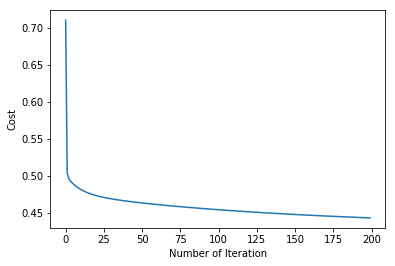

Manuel Test Accuracy: 81.25%


In [31]:
logistic_regression(x_train,y_train,x_test,y_test,1,200)

### <font color='blue'>Manuel Test Accuracy is **81.25%** <\font>


Let's find out sklearn's score.

In [32]:
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy {:.2f}%".format(lr.score(x_test.T,y_test.T)*100))

Test Accuracy 81.25%


$ $
### K-Nearest Neighbour (KNN) Classification
$ $

Let's see what will be score if we use KNN algorithm.

In [33]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 81.70%


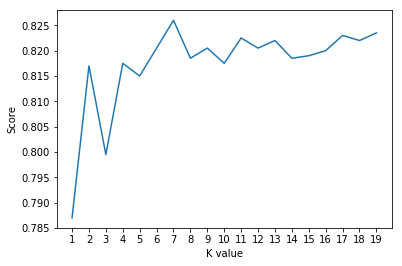

Maximum KNN Score is 82.60%


In [34]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))

As you can see above if we define k as 7 we will reach maximum score. 

### <font color='green'>KNN Model's Accuracy is <font color='red'>82.60%</font>

$ $

### Support Vector Machine (SVM) Algorithm
$ $

Now we will use SVM algorithm.

In [35]:
from sklearn.svm import SVC

In [36]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(x_test.T,y_test.T)*100))

Test Accuracy of SVM Algorithm: 79.75%


### <font color='orange'>Test Accuracy of SVM Algorithm is <font color='red'>79.75%</font>

$ $ 

### Naive Bayes Algorithm
$ $

In [38]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(x_test.T,y_test.T)*100))

Accuracy of Naive Bayes: 80.35%


### <font color='BlueViolet'>Accuracy of Naive Bayes: <font color='red'>80.35%</font>

$ $
### Decision Tree Algorithm

$ $

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test.T, y_test.T)*100))

Decision Tree Test Accuracy 80.35%


### <font color ='Brown'>Test Accuracy of Decision Tree Algorithm: <font color ='red'>80.25%</font>

### Random Forest Classification

$ $

In [40]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =1000, random_state = 1)
rf.fit(x_train.T, y_train.T)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test.T,y_test.T)*100))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Random Forest Algorithm Accuracy Score : 87.10%


 ### <font color ='Emerald'> Test Accuracy of Random Forest: <font color ='red'>87.10%</font>

Comparing Models

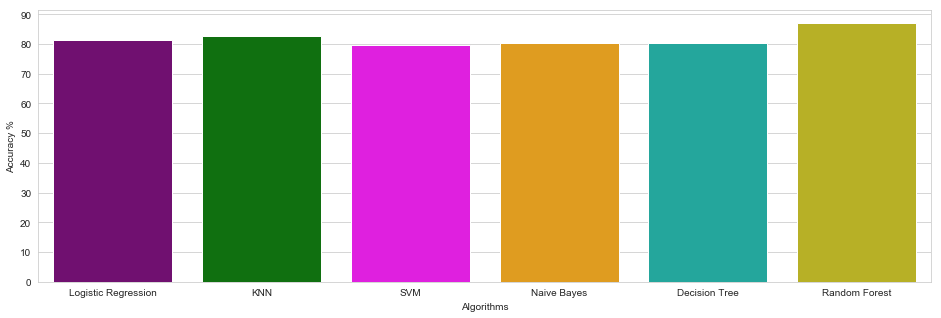

In [41]:
methods = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest"]
accuracy = [81.25, 82.60, 79.75, 80.35, 80.25, 87.10]
colors = ["purple", "green","magenta", "orange", "#0FBBAE","#CFC60E"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

$ $
From this models the best is Random Forest with 87.10% of accuracy. Let's look their confusion matrixes.

$ $

Confusion Matrix

$ $

In [42]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [43]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

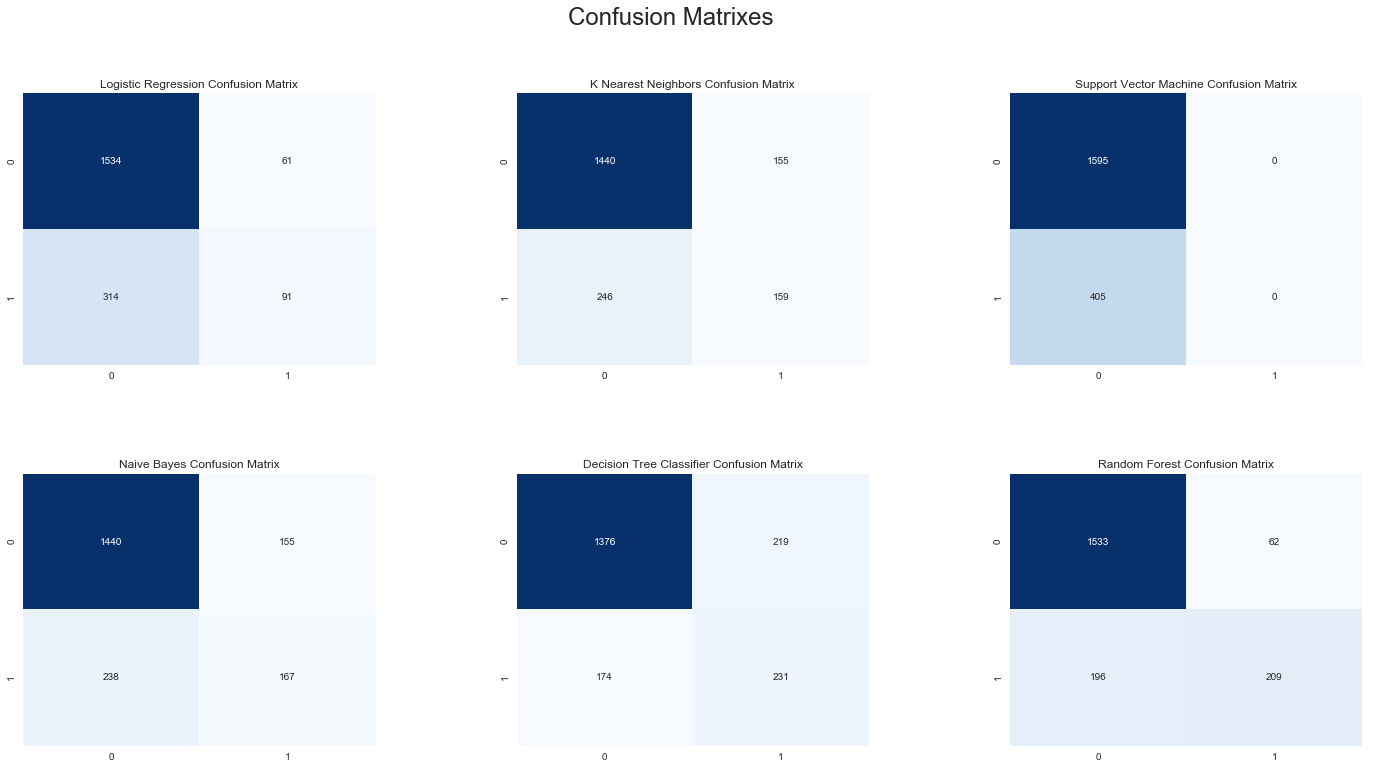

In [44]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.show()